<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        1. Import libraries, classes, custom functions, and data load</h1>

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()

utils.YelpDatasets_Revies(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


### Approach 1

In [42]:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(reviews['text'])

# Combine text features with binary features
X = tfidf_features
X = np.hstack((X.toarray(), reviews[['useful', 'funny', 'cool']].values))

# Encode the target variable (e.g., stars)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reviews['stars'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classification model (e.g., Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
"""

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import accuracy_score, classification_report\nimport numpy as np\n\n# Preprocessing and feature extraction\ntfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed\ntfidf_features = tfidf_vectorizer.fit_transform(reviews[\'text\'])\n\n# Combine text features with binary features\nX = tfidf_features\nX = np.hstack((X.toarray(), reviews[[\'useful\', \'funny\', \'cool\']].values))\n\n# Encode the target variable (e.g., stars)\nlabel_encoder = LabelEncoder()\ny = label_encoder.fit_transform(reviews[\'stars\'])\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Choose and train a classification model (e.g., Multinomial Naive Bayes)\nclas

### Approach 2 Miguel example

In [43]:
#pip install tensorflow

In [44]:
import pandas as pd,numpy as np,seaborn as sns
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [45]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [46]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [47]:
yelp_reviews=reviews.drop(['review_id','user_id','business_id','date','useful','funny','cool'],axis=1)
yelp_reviews.head()

,stars,text
0,3,"If you decide to eat here, just be aware it is..."
1,5,I've taken a lot of spin classes over the year...
2,3,Family diner. Had the buffet. Eclectic assortm...
3,5,"Wow! Yummy, different, delicious. Our favo..."
4,4,Cute interior and owner (?) gave us tour of up...


In [48]:
yelp_reviews.isnull().any()

stars    False
text     False
dtype: bool

In [49]:
yelp_reviews.stars.unique()

array([3, 5, 4, 1, 2], dtype=int64)

c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

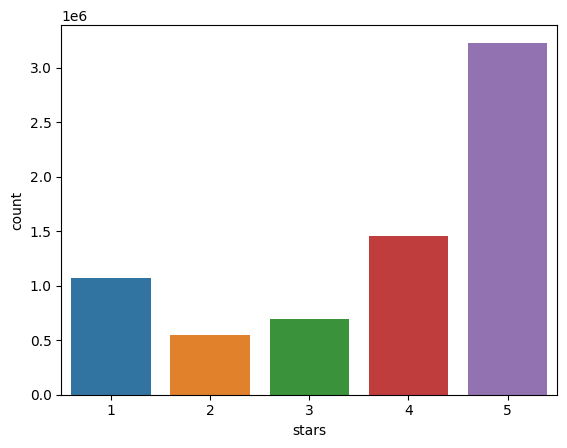

In [50]:
sns.countplot(yelp_reviews.stars)

In [51]:
yelp_reviews.stars.mode() # The data that is most to be sampled

0    5
dtype: int64

In [52]:
reviews_not_three = yelp_reviews[yelp_reviews.stars!=3]

In [53]:
reviews_not_three['label'] = reviews_not_three['stars'].apply(lambda x: 1 if x>3 else 0)
reviews_not_three = reviews_not_three.drop('stars',axis=1)
reviews_not_three.head()

C:\Users\Karim\AppData\Local\Temp\ipykernel_5388\94272368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_not_three['label'] = reviews_not_three['stars'].apply(lambda x: 1 if x>3 else 0)


,text,label
1,I've taken a lot of spin classes over the year...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
5,I am a long term frequent customer of this est...,0
6,Loved this tour! I grabbed a groupon and the p...,1


In [54]:
reviews_not_three.shape

(6298346, 2)

In [55]:
text = reviews_not_three.text.values
label = reviews_not_three.label.values

In [56]:
#python -m spacy download en_core_web_sm

In [57]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0.tar.gz

In [58]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [59]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [60]:
import spacy
print(spacy.__version__)

3.6.1


In [61]:
text[0]

"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!"

In [62]:
parsed_text = nlp(text[0])
parsed_text

I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

In [63]:
for i,sentance in enumerate(parsed_text.sents):
    print(i,':',sentance)

0 : I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle.
1 : From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.


2 : For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).


3 : There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out.
4 : Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed.
5 : He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone.
6 : Russell always wears a smile on his face, even when he's kicking your butt in class!


In [64]:
for num, entity in enumerate(nlp(text[10]).ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)

Entity 1: first - ORDINAL
Entity 2: Sonoran Dogs - PERSON


In [65]:
token_pos = [token.pos_ for token in nlp(text[10])]
tokens = [token for token in nlp(text[10])]
sd = list(zip(tokens,token_pos))
sd = pd.DataFrame(sd,columns=['token','pos'])
sd.head()

,token,pos
0,The,DET
1,bun,NOUN
2,makes,VERB
3,the,DET
4,Sonoran,PROPN


In [66]:
max_num_words = 1000
max_seq_length = 100
tokenizer = Tokenizer(num_words=max_num_words)

In [67]:
len(reviews)

6990280

In [68]:
reviews=reviews[:100000]
reviews=reviews[reviews.stars!=3]

reviews["labels"]= reviews["stars"].apply(lambda x: 1 if x > 3  else 0)
reviews=reviews.drop("stars",axis=1)

reviews.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,labels
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,0
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1


In [69]:
texts = reviews["text"].values
labels = reviews["labels"].values

In [70]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [71]:
len(word_index)

69661

In [72]:
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[  2, 282,   5, ...,  70,  11, 909],
       [  0,   0,   0, ..., 566,  20, 109],
       [  0,   0,   0, ...,  46,   7,   1],
       ...,
       [  0,   0,   0, ..., 227,   8,   3],
       [  0,   0,   0, ..., 239,   9,  39],
       [  0,   0,   0, ..., 502,   4,  77]])

In [73]:
data.shape

(88638, 100)

In [74]:
labels = to_categorical(np.asarray(labels))

In [75]:
labels.shape

(88638, 2)

In [76]:
validation_spilit = 0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [77]:
data = data[indices]
data

array([[  0,   0,   0, ..., 153, 153, 586],
       [  0,   0,   0, ..., 151, 143, 742],
       [  0,   0,   0, ...,   3, 284,  44],
       ...,
       [ 37, 166,   2, ..., 244, 404,  96],
       [  0,   0,   0, ...,  39,  38,  11],
       [  0,   0,   0, ...,  35, 148,  74]])

In [78]:
labels = labels[indices]
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [79]:
nb_validation_samples = int(validation_spilit*data.shape[0])
nb_validation_samples

17727

In [80]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [83]:
glove_dir = 'D:/College/20231(M)/ADC'

In [84]:
embedding_index = {}

f = open(os.path.join(glove_dir,'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

print('found word vecs: ',len(embedding_index))

found word vecs:  0


In [85]:
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
embedding_matrix.shape

(69662, 50)

In [86]:
for word,i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index)+1,embedding_dim,weights=[embedding_matrix],input_length=max_seq_length,trainable=False)

In [88]:
from keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D
from keras.layers import LSTM,Input,Dense,Dropout,Activation
from keras.models import Model

In [89]:
inp = Input(shape=(max_seq_length,))
x = embedding_layer(inp)
x = Bidirectional(LSTM(50,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(2,activation='sigmoid')(x)
model = Model(inputs=inp,outputs=x)

In [90]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(70911, 100)
(70911, 2)
(17727, 100)
(17727, 2)


In [92]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=128);

Epoch 1/20
554/554 [==============================] - 2742s 5s/step - loss: 0.6311 - accuracy: 0.7875 - val_loss: 0.5870 - val_accuracy: 0.7798
Epoch 2/20
554/554 [==============================] - 2680s 5s/step - loss: 0.5561 - accuracy: 0.7884 - val_loss: 0.5440 - val_accuracy: 0.7798
Epoch 3/20
554/554 [==============================] - 2678s 5s/step - loss: 0.5273 - accuracy: 0.7884 - val_loss: 0.5303 - val_accuracy: 0.7798
Epoch 4/20
554/554 [==============================] - 23081s 42s/step - loss: 0.5185 - accuracy: 0.7884 - val_loss: 0.5274 - val_accuracy: 0.7798
Epoch 5/20
554/554 [==============================] - 2715s 5s/step - loss: 0.5164 - accuracy: 0.7884 - val_loss: 0.5272 - val_accuracy: 0.7798
Epoch 6/20
554/554 [==============================] - 2651s 5s/step - loss: 0.5161 - accuracy: 0.7884 - val_loss: 0.5273 - val_accuracy: 0.7798
Epoch 7/20
554/554 [==============================] - 26171s 47s/step - loss: 0.5161 - accuracy: 0.7884 - val_loss: 0.5274 - val_accur

In [93]:
score = model.evaluate(x_val,y_val)
score

554/554 [==============================] - 160s 285ms/step - loss: 0.5274 - accuracy: 0.7798


[0.5273854732513428, 0.7797709703445435]

In [94]:
score[1]*100

77.97709703445435

### Approach 3

In [ ]:
reviews = reviews.sample(n=5000, random_state=42)
display(reviews)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3794719,O6bpWULxbI9-0ZgAz7hYcQ,dxGxq_KX9j9KvKO0GMyvRw,-0EdehHjIQc0DtYU8QcAig,5,0,0,0,Have eaten at New Tung Tung for several years ...,2018-12-04 22:41:28
2716988,e8tzUrpjac5Uqg6OytCwEQ,tWdxHG8-UGJncCp-BgJIhg,Z4PF4EtM12L7nwOHZHFJNA,2,1,0,0,I've been vegan/vegetarian for 21 yrs and was ...,2016-08-15 01:37:59
2932156,2rZ5lltnzlBfE2jEgQ102g,h0i0cpoCmiwOwERRI2yWpA,mpf51URhzEQQjc186BKUcA,2,1,0,0,Service was absolutely great. Our waitress was...,2017-10-06 19:41:28
702597,Ke1esEdGLpXw9zpufBgIrw,koYnchCFCDXo0ac0sgFhlA,coR0dFgGOU7fVku6xDdH-A,1,1,0,0,"As a drop in, I could not understand how peopl...",2012-11-02 07:43:16
4830413,1dTBYUD5zkb2kFo7ztu-3Q,4ExV-552BD1zk3TBBOa1gg,LYgLZ6mMp15rpMJqOEEKPQ,1,0,0,0,In response to my prior review one of the owne...,2021-11-01 21:51:36
...,...,...,...,...,...,...,...,...,...
1306408,M0PNlyyBYDdOm9DGl7E92A,42xSKnCgTLAiRfruxtN-dg,zSIArgI4wjgDJBgYXfNxgA,1,0,0,0,Something has changed and not for the good! W...,2020-02-21 23:37:25
5120652,DNyW8pedR9EzMeNqP1zalw,1YyBV9j6k6bfIpsnmQAjnQ,pGRl61t6HcvqvvRz0Shr7Q,4,0,0,0,I was in Boise for a business trip and decided...,2017-09-16 22:05:27
6584506,Syvo_fdmgopAXQguyEbitw,SJvCPlJ5X6Jkbc0TggIiCg,chUeS0h9C8KGfyJO2Jqgew,5,3,0,2,I am now hooked on The Gracey- their falafel s...,2012-03-26 18:50:18
4347583,Zbd60vVVbZz8IfvjCJDvig,PficybxOMu_4ekvyvoFIyg,wz8ZPfySQczcPgSyd33-HQ,4,5,2,4,Our favorite place to stay & play. I can actua...,2016-10-29 16:03:19


##### To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [ ]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
3794719,O6bpWULxbI9-0ZgAz7hYcQ,dxGxq_KX9j9KvKO0GMyvRw,-0EdehHjIQc0DtYU8QcAig,5,0,0,0,Have eaten at New Tung Tung for several years ...,2018-12-04 22:41:28,178
2716988,e8tzUrpjac5Uqg6OytCwEQ,tWdxHG8-UGJncCp-BgJIhg,Z4PF4EtM12L7nwOHZHFJNA,2,1,0,0,I've been vegan/vegetarian for 21 yrs and was ...,2016-08-15 01:37:59,779
2932156,2rZ5lltnzlBfE2jEgQ102g,h0i0cpoCmiwOwERRI2yWpA,mpf51URhzEQQjc186BKUcA,2,1,0,0,Service was absolutely great. Our waitress was...,2017-10-06 19:41:28,560
702597,Ke1esEdGLpXw9zpufBgIrw,koYnchCFCDXo0ac0sgFhlA,coR0dFgGOU7fVku6xDdH-A,1,1,0,0,"As a drop in, I could not understand how peopl...",2012-11-02 07:43:16,210
4830413,1dTBYUD5zkb2kFo7ztu-3Q,4ExV-552BD1zk3TBBOa1gg,LYgLZ6mMp15rpMJqOEEKPQ,1,0,0,0,In response to my prior review one of the owne...,2021-11-01 21:51:36,896


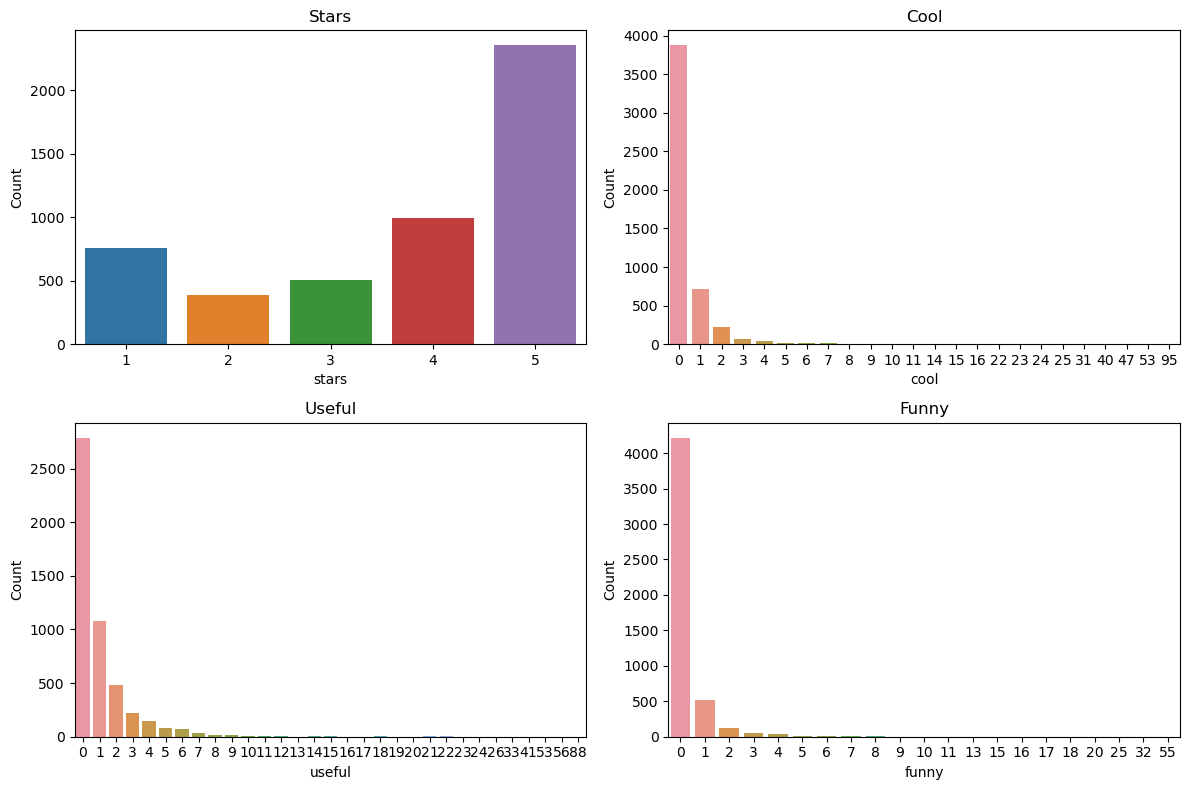

In [ ]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

##### Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

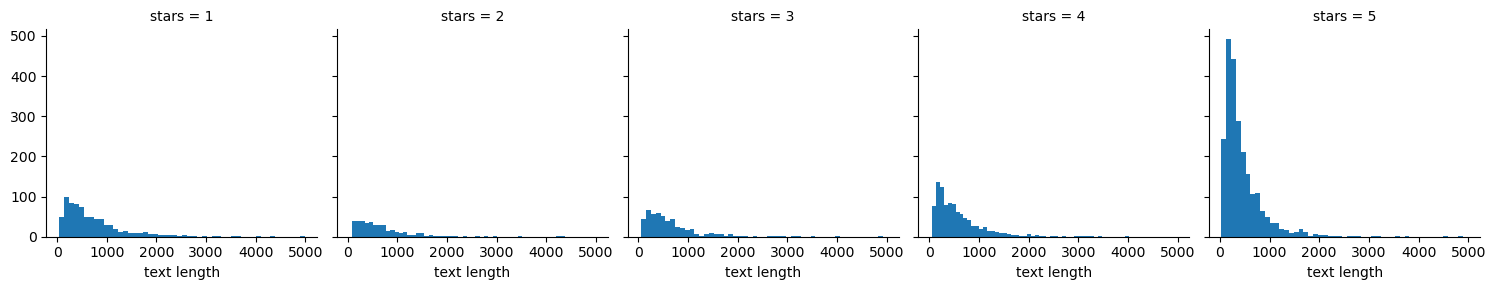

In [ ]:
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

C:\Users\pport\AppData\Local\Temp\ipykernel_20124\313122982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['text length'], kde=True, bins=50)


Text(0.5, 1.0, 'Text Length Distribution')

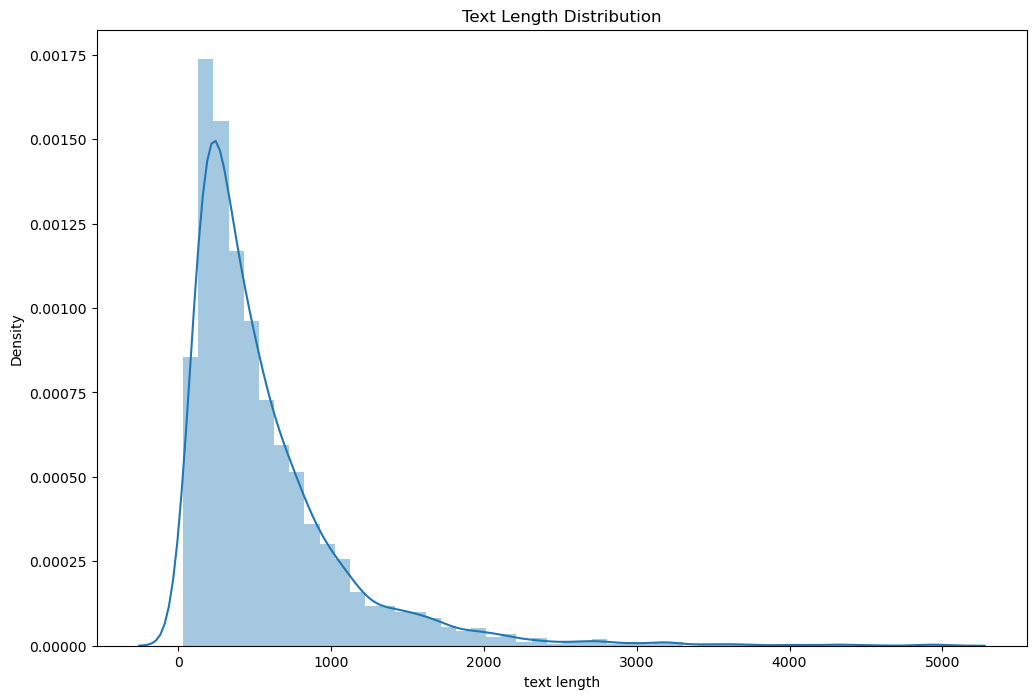

In [ ]:
# Text Length
fig = plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

##### Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

<Axes: xlabel='stars', ylabel='text length'>

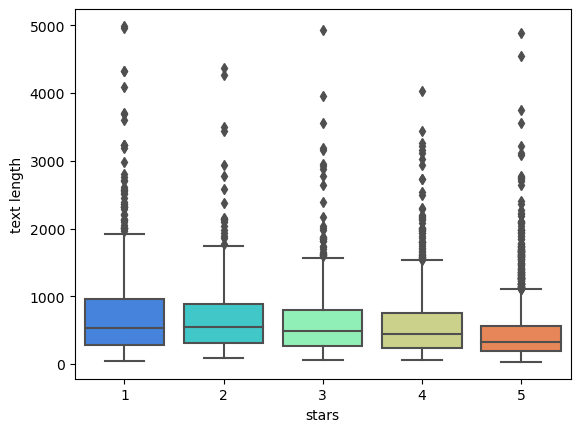

In [ ]:
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

##### Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [ ]:
stars = reviews.groupby('stars').mean()
stars.corr()

C:\Users\pport\AppData\Local\Temp\ipykernel_12592\1148758039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = reviews.groupby('stars').mean()


,useful,funny,cool,text length
useful,1.000000,0.994864,-0.653334,0.808545
funny,0.994864,1.000000,-0.624593,0.831117
cool,-0.653334,-0.624593,1.000000,-0.822301
text length,0.808545,0.831117,-0.822301,1.000000


##### To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

Text(0.5, 1.0, 'Heatmap of Variables')

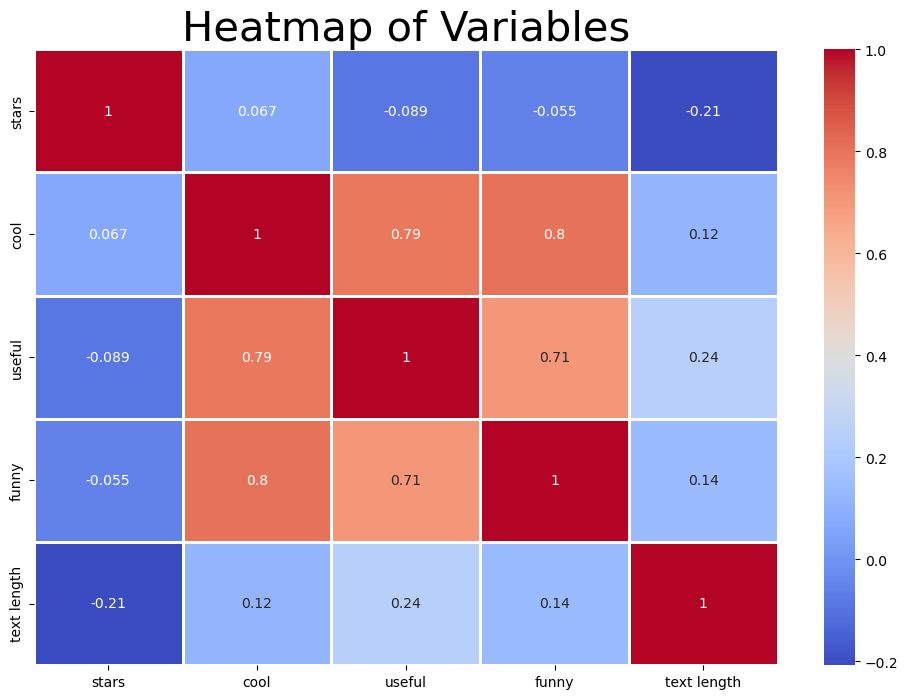

In [ ]:
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

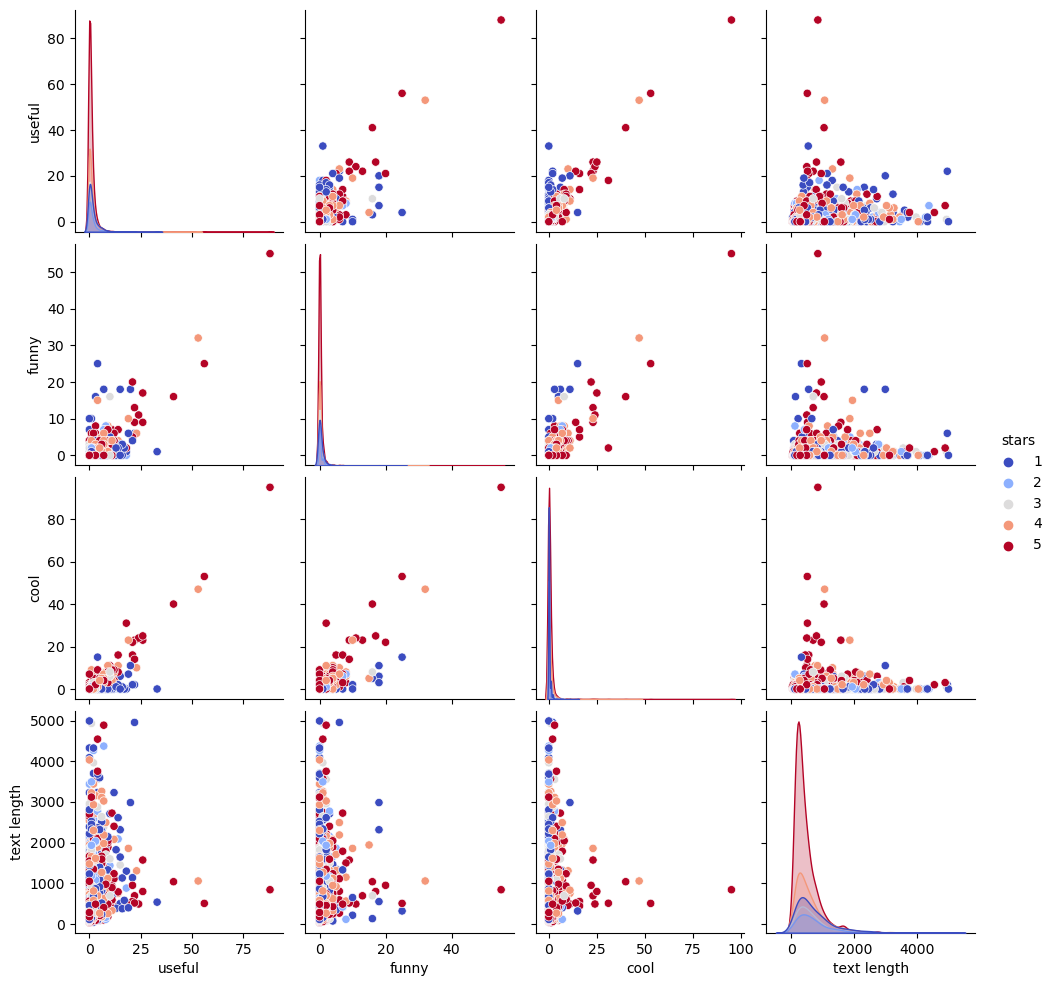

In [ ]:
sns.pairplot(reviews, hue='stars', palette='coolwarm')

In [15]:
yelp_text = reviews[['stars', 'text']]
yelp_text.head()

,stars,text
3794719,5,Have eaten at New Tung Tung for several years ...
2716988,2,I've been vegan/vegetarian for 21 yrs and was ...
2932156,2,Service was absolutely great. Our waitress was...
702597,1,"As a drop in, I could not understand how peopl..."
4830413,1,In response to my prior review one of the owne...


In [16]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [17]:
yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['text'] = yelp_text_allstars['text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

stars    5000
text     5000
dtype: int64

In [18]:
yelp_text_allstars.head()

,stars,text
3794719,5,"[eaten, new, tung, tung, several, years, alway..."
2716988,2,"[ive, veganvegetarian, 21, yrs, excited, check..."
2932156,2,"[service, absolutely, great, waitress, super, ..."
702597,1,"[drop, could, understand, people, could, notic..."
4830413,1,"[response, prior, review, one, owners, establi..."


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


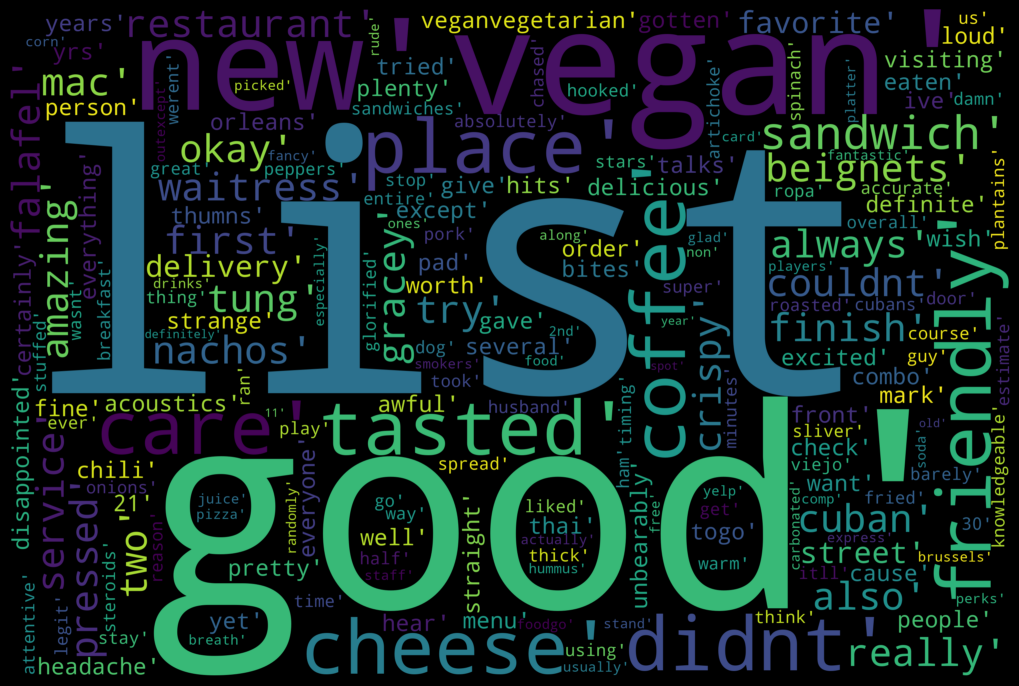

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

yelp_allstars_text = yelp_text_allstars['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [11]:
yelp_text_stars1 = yelp_text[yelp_text['stars']==1]
yelp_text_stars1['text'] = yelp_text_stars1['text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

NameError: name 'yelp_text' is not defined

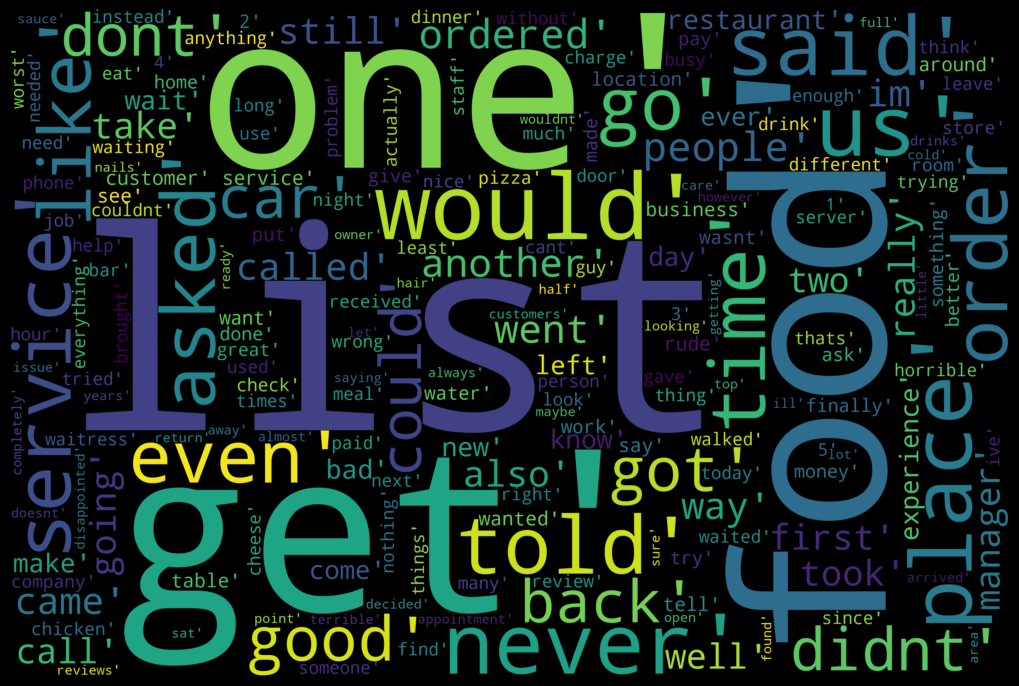

In [ ]:
yelp_stars1_text = yelp_text_stars1['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
yelp_text_stars5 = yelp_text[yelp_text['stars']==5]
yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

C:\Users\pport\AppData\Local\Temp\ipykernel_20124\618402270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)


stars    2355
text     2355
dtype: int64

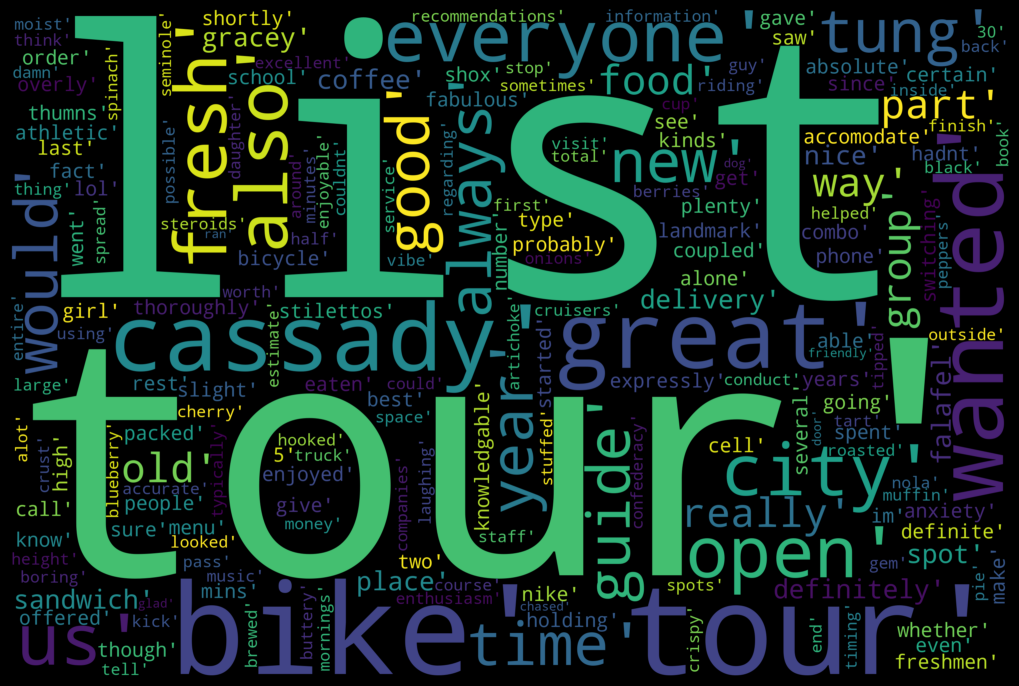

In [ ]:
yelp_stars5_text = yelp_text_stars5['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

#### ML without TF-IDF
##### Currently, what we have is 'text', which cannot be recoganized by machine learning model. We need to transfer those texts to vectors that can be used in machine learning model. What's more, let's first build up a machine learning model without using TF-IDF (term frequency-inverse document frequency.

In [ ]:
X = reviews['text']
y = reviews['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
30,0.1,30,1.13


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_test_pred = mnb.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.64      0.78      0.70        73
           2       0.00      0.00      0.00        36
           3       0.25      0.02      0.04        45
           4       0.44      0.42      0.43       113
           5       0.68      0.86      0.76       233

    accuracy                           0.61       500
   macro avg       0.40      0.42      0.39       500
weighted avg       0.53      0.61      0.56       500



#### ML using TF-IDF
##### Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document, measuring how frequently a term occures in document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears, measuring how important a term is.

In [ ]:
tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)

grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
1,0.1,1,3.086


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

X = reviews['text']
y = reviews['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        98
           5       0.45      1.00      0.62       225

    accuracy                           0.45       500
   macro avg       0.09      0.20      0.12       500
weighted avg       0.20      0.45      0.28       500



c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ML for Stars 1 and 5

In [ ]:
yelp_df12 = reviews[(reviews.stars==1) | (reviews.stars==5)]
X = yelp_df12['text']
y = yelp_df12['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
18,0.1,18,0.820513


In [ ]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('classifier', MultinomialNB())])

X = yelp_df12['text']
y = yelp_df12['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.86      0.87      0.86        82
           5       0.95      0.95      0.95       230

    accuracy                           0.93       312
   macro avg       0.90      0.91      0.91       312
weighted avg       0.93      0.93      0.93       312



### Approach 4

In [4]:
reviews = reviews.sample(n=5000, random_state=42)
display(reviews)
reviews.describe()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3794719,O6bpWULxbI9-0ZgAz7hYcQ,dxGxq_KX9j9KvKO0GMyvRw,-0EdehHjIQc0DtYU8QcAig,5,0,0,0,Have eaten at New Tung Tung for several years ...,2018-12-04 22:41:28
2716988,e8tzUrpjac5Uqg6OytCwEQ,tWdxHG8-UGJncCp-BgJIhg,Z4PF4EtM12L7nwOHZHFJNA,2,1,0,0,I've been vegan/vegetarian for 21 yrs and was ...,2016-08-15 01:37:59
2932156,2rZ5lltnzlBfE2jEgQ102g,h0i0cpoCmiwOwERRI2yWpA,mpf51URhzEQQjc186BKUcA,2,1,0,0,Service was absolutely great. Our waitress was...,2017-10-06 19:41:28
702597,Ke1esEdGLpXw9zpufBgIrw,koYnchCFCDXo0ac0sgFhlA,coR0dFgGOU7fVku6xDdH-A,1,1,0,0,"As a drop in, I could not understand how peopl...",2012-11-02 07:43:16
4830413,1dTBYUD5zkb2kFo7ztu-3Q,4ExV-552BD1zk3TBBOa1gg,LYgLZ6mMp15rpMJqOEEKPQ,1,0,0,0,In response to my prior review one of the owne...,2021-11-01 21:51:36
...,...,...,...,...,...,...,...,...,...
1306408,M0PNlyyBYDdOm9DGl7E92A,42xSKnCgTLAiRfruxtN-dg,zSIArgI4wjgDJBgYXfNxgA,1,0,0,0,Something has changed and not for the good! W...,2020-02-21 23:37:25
5120652,DNyW8pedR9EzMeNqP1zalw,1YyBV9j6k6bfIpsnmQAjnQ,pGRl61t6HcvqvvRz0Shr7Q,4,0,0,0,I was in Boise for a business trip and decided...,2017-09-16 22:05:27
6584506,Syvo_fdmgopAXQguyEbitw,SJvCPlJ5X6Jkbc0TggIiCg,chUeS0h9C8KGfyJO2Jqgew,5,3,0,2,I am now hooked on The Gracey- their falafel s...,2012-03-26 18:50:18
4347583,Zbd60vVVbZz8IfvjCJDvig,PficybxOMu_4ekvyvoFIyg,wz8ZPfySQczcPgSyd33-HQ,4,5,2,4,Our favorite place to stay & play. I can actua...,2016-10-29 16:03:19


,stars,useful,funny,cool
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.758400,1.152400,0.320800,0.480400
std,1.481374,2.805984,1.506632,2.256155
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,88.000000,55.000000,95.000000


##### To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [10]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,394
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,263
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,212
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,160
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,218


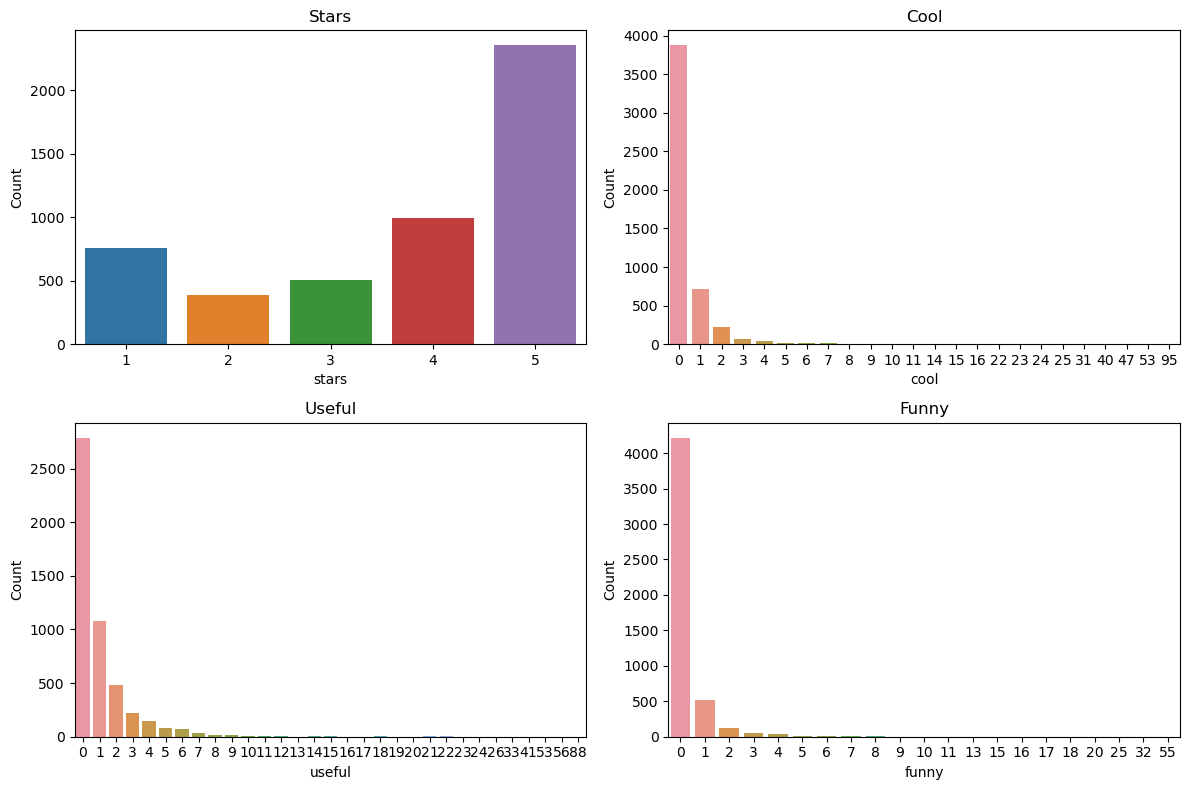

In [ ]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

##### Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

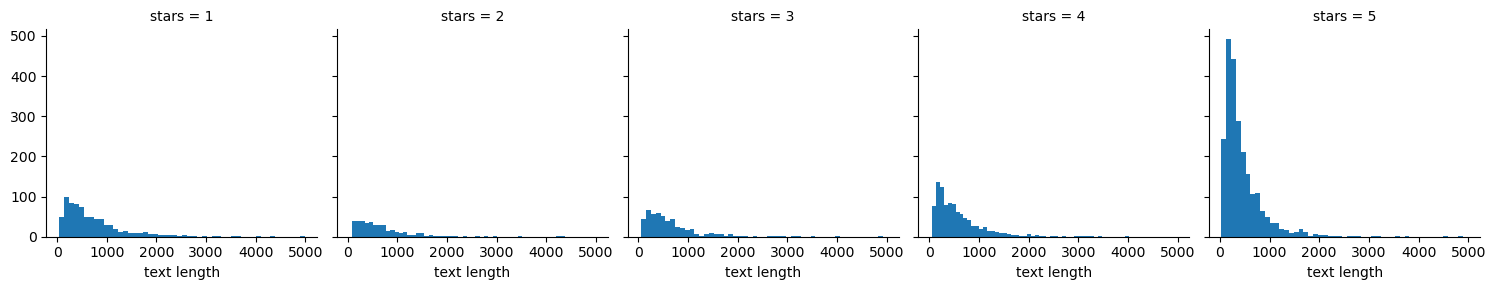

In [ ]:
g = sns.FacetGrid(data=reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

C:\Users\cmigu\AppData\Local\Temp\ipykernel_18756\313122982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['text length'], kde=True, bins=50)


Text(0.5, 1.0, 'Text Length Distribution')

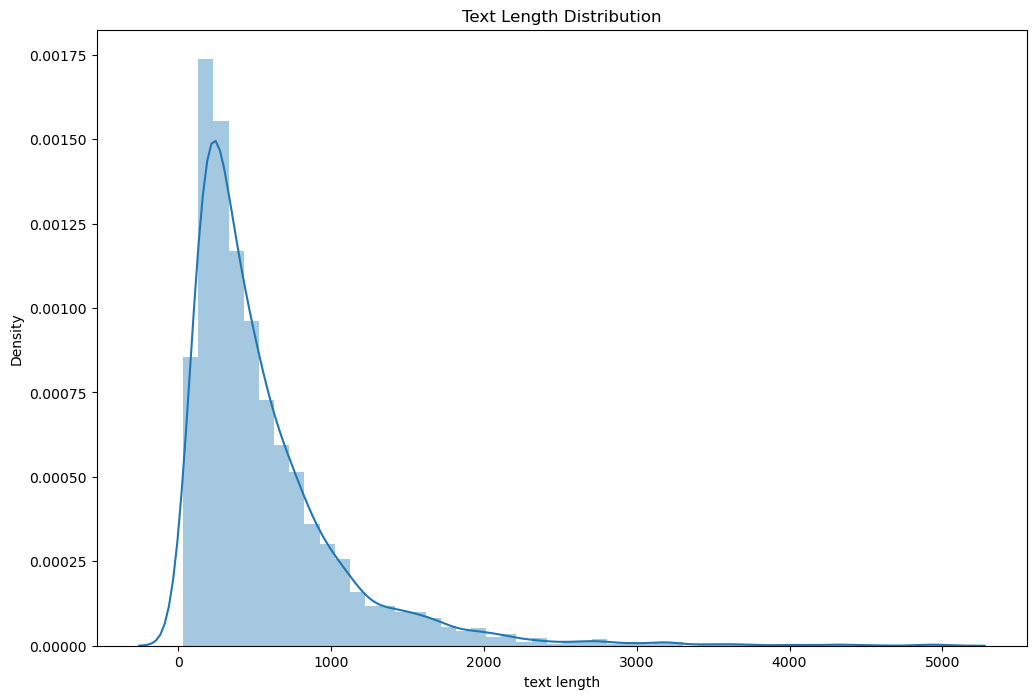

In [11]:
# Text Length
fig = plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

##### Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

<Axes: xlabel='stars', ylabel='text length'>

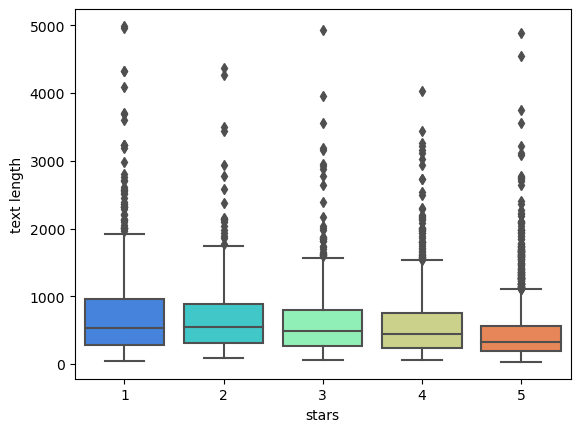

In [ ]:
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

##### Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [5]:
stars = reviews.groupby('stars').mean()
stars.corr()

C:\Users\pport\AppData\Local\Temp\ipykernel_27828\1148758039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = reviews.groupby('stars').mean()


,useful,funny,cool,text length
useful,1.000000,0.994864,-0.653334,0.808545
funny,0.994864,1.000000,-0.624593,0.831117
cool,-0.653334,-0.624593,1.000000,-0.822301
text length,0.808545,0.831117,-0.822301,1.000000


##### To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

Text(0.5, 1.0, 'Heatmap of Variables')

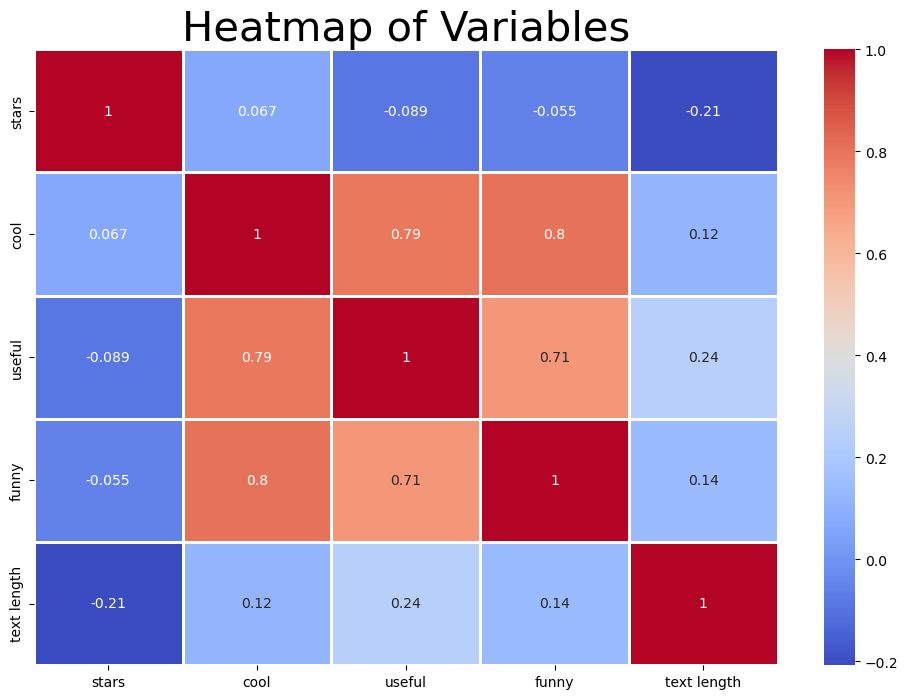

In [6]:
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

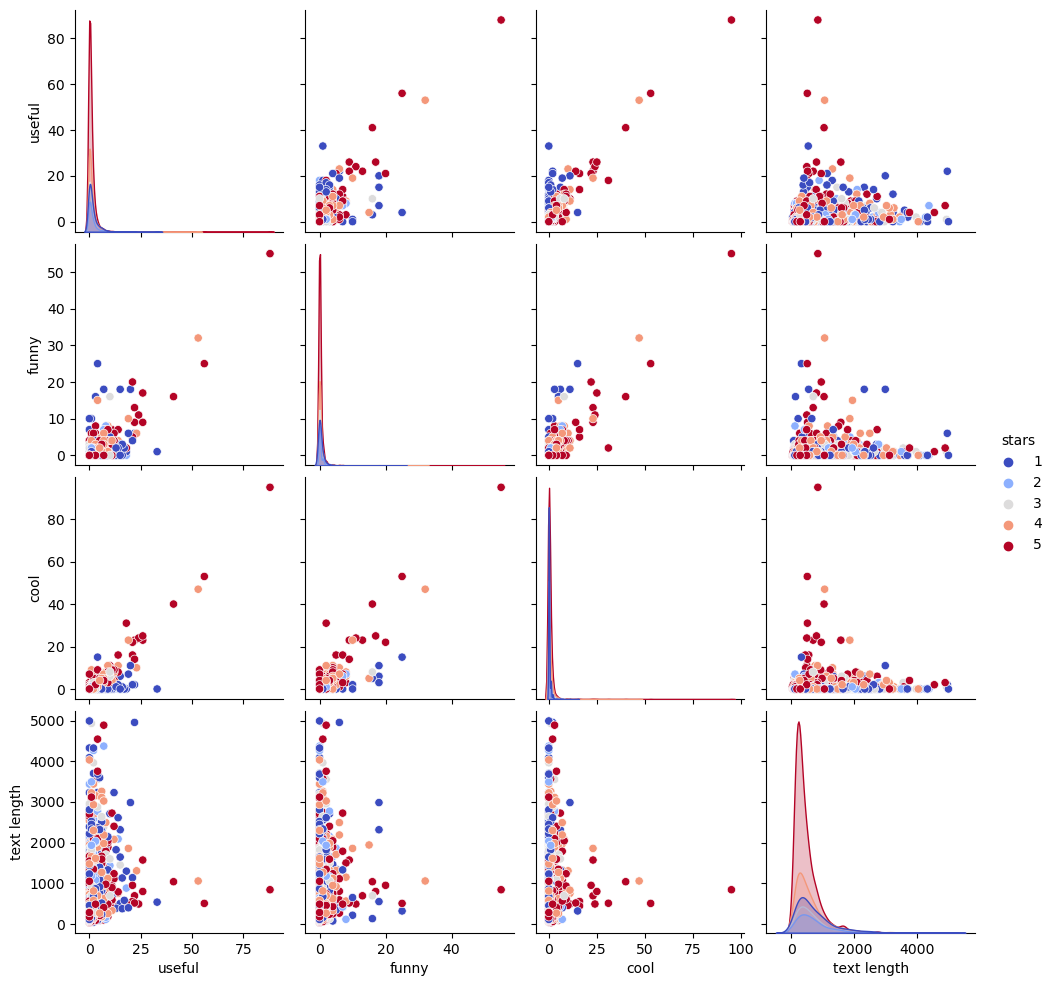

In [ ]:
sns.pairplot(reviews, hue='stars', palette='coolwarm')

##### Aprroach itself

In [5]:
# assign reviews with stars > 3 as positive sentiment
# stars < 3 negative sentiment
# remove stars = 3
df=reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

C:\Users\pport\AppData\Local\Temp\ipykernel_12980\3558855289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)


In [16]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length,sentiment
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,394,-1
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,263,1
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,212,1
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,160,1
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,218,1
...,...,...,...,...,...,...,...,...,...,...,...
4611756,9kdLUk3lakBVCZ10WCivaw,IIvKeXkoSpMss3LCNKbshw,Wg2aWqkRxvhH2GoM0w4oSw,5,0,0,0,"On time very efficient took great photos, did ...",2015-07-27 01:54:24,260,1
3536515,Wm2HffifnVPl3x8sO4NW7g,ZSbprkx9052-4LYpMmB8IA,fC03dk7N8XV-RzGh0UJgmA,5,0,0,0,Best ice cream ever...not too far from city mu...,2017-03-28 20:38:16,85,1
5730804,4IzbwfjgwUq1gXKA97Erwg,lESGYBwhs9ZtpWeJf_2Zig,hGCETx03FN8Qtx1T8StHaQ,5,0,0,0,This is our go-to pizza place! We love their ...,2018-09-05 23:00:37,418,1
1995249,23xRe5HtAsPlHyUuM7AFTQ,5pgl40PSrB-dTbEg-eWIFA,ecapYwbEvmKHKAfsGA4tow,4,3,0,0,This is located in a great spot fairly close t...,2014-02-13 22:54:43,1394,1


In [7]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
#df = reviews
#df["target"] = np.where(df["stars"] >= 3, 1, 0)
#df.head(3)

# Picking the only text and target column
#df_final = df[['text','target']]

In [13]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,394
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,263
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,212
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,160
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,218
...,...,...,...,...,...,...,...,...,...,...
5884448,bXXRzBg7DuGnY8ij4INBWg,9fP3KiiVpFVYcnqgD3aZJw,iaBU5h_j0TCrUFzTbjFIlw,3,9,0,0,I am not sure what to think of this place. I b...,2013-04-09 22:29:48,1330
6745875,FkekUQC8z63ywSFQnK4Z4w,JLW2uULP_Q1KXHhToNljcQ,jMStvE-tQzSpRCAO0nAE6g,3,5,2,8,I'm so excited to see the red Robin had re-ope...,2018-09-27 23:47:13,893
5730804,4IzbwfjgwUq1gXKA97Erwg,lESGYBwhs9ZtpWeJf_2Zig,hGCETx03FN8Qtx1T8StHaQ,5,0,0,0,This is our go-to pizza place! We love their ...,2018-09-05 23:00:37,418
1995249,23xRe5HtAsPlHyUuM7AFTQ,5pgl40PSrB-dTbEg-eWIFA,ecapYwbEvmKHKAfsGA4tow,4,3,0,0,This is located in a great spot fairly close t...,2014-02-13 22:54:43,1394


In [6]:
from wordcloud import WordCloud
from os import path
from PIL import Image
# Dividing the reviews to positive and negative
pos = df[df['sentiment']==1]['text']
neg = df[df['sentiment']==-1]['text']

In [9]:
pos

3794719    Have eaten at New Tung Tung for several years ...
6424112    This is the absolute best bike tour! I thoroug...
4736724    Great food, going to be a regular here.\n\nTyp...
3031998    Great spot.  I had the cherry pie (tart, fresh...
4082240    First time here & just wanted to have a variet...
                                 ...                        
2846342    Nice new quaint casino.  Check out their websi...
5120652    I was in Boise for a business trip and decided...
6584506    I am now hooked on The Gracey- their falafel s...
4347583    Our favorite place to stay & play. I can actua...
5981278    So glad we randomly picked this restaurant to ...
Name: text, Length: 3348, dtype: object

In [7]:
#Wordcloud — Positive Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in pos.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'STOPWORDS' is not defined

In [ ]:
#Wordcloud — Negative Sentiment
neg = " ".join(review for review in neg.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
#distribution of reviews with sentiment across the dataset
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [7]:
#the teachers code has an algorithm that removes any non alpha chars
#import re

#corpus = []
#for i in range(0, dataset['Review'].size):
#    # get review and remove non alpha chars
#    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
#    # add review to corpus
#   corpus.append(review)
#print(corpus)

import re 
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [ ]:
# applying the cleaning function to text column
df_final=df
df_final['text'] = df_final['text'].apply(lambda text: function_clean(text))

In [11]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final["text"]
y = df_final["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
y.value_counts()

1    3850
0    1150
Name: target, dtype: int64

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000,), (1000,), (4000,), (1000,))

In [14]:
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()          # to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Use 'english' as the stop words
vect_1 = TfidfVectorizer(min_df=100, tokenizer=my_tokenizer, stop_words='english', ngram_range=(1, 3)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
# Get the feature names
feature_names = vect_1.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
new_df_words = pd.DataFrame(columns=feature_names, data=X_train1.toarray())
new_df_words

,able,absolutely,actually,amazing,area,arrived,ask,asked,atmosphere,attentive,away,awesome,bad,bar,beautiful,beef,beer,best,better,big,bit,bread,breakfast,bring,brought,burger,business,busy,called,came,car,care,check,cheese,chicken,city,clean,close,coffee,cold,come,comes,coming,cooked,cool,couple,cream,customer,customer service,customers,day,days,deal,decided,definitely,delicious,different,dining,dinner,disappointed,dish,dishes,door,drink,drinks,easy,eat,eating,end,ended,enjoy,enjoyed,especially,excellent,experience,extra,extremely,family,fantastic,far,fast,favorite,feel,felt,finally,fish,flavor,food,food good,free,fresh,fried,friend,friendly,friends,fries,fun,gave,getting,going,good,got,great,half,happy,hard,help,helpful,high,highly,highly recommend,home,hot,hour,hours,house,huge,husband,id,ill,im,inside,instead,items,ive,job,kind,know,large,late,later,leave,left,let,like,line,little,live,local,location,long,look,looked,looking,lot,love,loved,lunch,make,makes,manager,maybe,meal,meat,menu,minutes,money,music,need,needed,new,nice,night,offer,oh,ok,old,open,options,order,ordered,outside,overall,owner,parking,pay,people,perfect,person,phone,pick,pizza,place,places,plus,pm,point,portions,pretty,price,prices,probably,quality,quick,quite,really,really good,recommend,restaurant,restaurants,return,review,reviews,rice,right,room,rude,said,salad,sandwich,sat,sauce,saw,say,seated,seating,second,selection,served,server,service,shop,shrimp,sit,small,soon,soup,special,spicy,spot,st,staff,star,stars,start,started,stay,steak,stop,stopped,store,street,super,sure,sweet,table,tables,taking,taste,tasted,tasty,tell,thank,theyre,thing,things,think,thought,time,times,today,told,took,town,tried,trip,try,trying,use,used,usually,visit,wait,waited,waiting,waitress,walk,walked,want,wanted,water,way,week,went,wife,wine,wish,wonderful,work,working,worst,worth,wrong,year,years
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.205918,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.262339,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.259042,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.476413,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.195942,0.000000,0.000000,0.00000,0.0,0.263192,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.557565,0.000000,0.279904,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.209174,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.232512,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.246864,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.182895,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.

In [17]:
# Counting most repetitive words
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words_df = pd.DataFrame({"word": feature_names, "count": word_counts})
words_df.sort_values(by="count", ascending=False, inplace=True)
words_df.head(20)

,word,count
87,food,239.392103
102,great,233.755112
182,place,216.242617
100,good,216.059609
220,service,186.519055
258,time,156.580679
134,like,147.582107
195,really,122.241525
17,best,120.598559
231,staff,117.725724


In [18]:
from imblearn.over_sampling import SMOTE

#SMOTE the training data
sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_train1, y_train)

In [19]:
y_bal.value_counts()

1    3056
0    3056
Name: target, dtype: int64

##### Logistic Regression

In [20]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

Score on training set: 0.88425
Score on test set: 0.856


In [21]:
from sklearn.metrics import classification_report
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr)
print('The Classification report')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,168,38
True 1,106,688


The Classification report


,precision,recall,f1-score,support
0,0.613139,0.815534,0.700000,206.000
1,0.947658,0.866499,0.905263,794.000
accuracy,0.856000,0.856000,0.856000,0.856
macro avg,0.780399,0.841016,0.802632,1000.000
weighted avg,0.878747,0.856000,0.862979,1000.000


###### ### Grid search (logistic) Let's now try to optimize some hyperparameters. We will start off with the logistic regression by finding out the optimal value for parameter C by applying the Grid search.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_bal, y_bal)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=1))])

###### After grid search we found our optimal parameter and applied in the our model. As a result, the train and test accuracy slightly are increased.

In [23]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

# Creating confusion matrix/ dataFrame
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_lr

Score on training set: 0.8915
Score on test set: 0.856


,Predicted 0,Predicted 1
True 0,166,40
True 1,104,690


##### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(random_state=1)
my_random_forest.fit(X_bal, y_bal)
print(f"Random Forest: {my_random_forest.score(X_bal, y_bal)}")
print(f"Random Forest: {my_random_forest.score(X_test1, y_test)}")

Random Forest: 1.0
Random Forest: 0.874


###### To find the optimal n_estimators parameter, we are going to try various number of n_estimators as shown below.

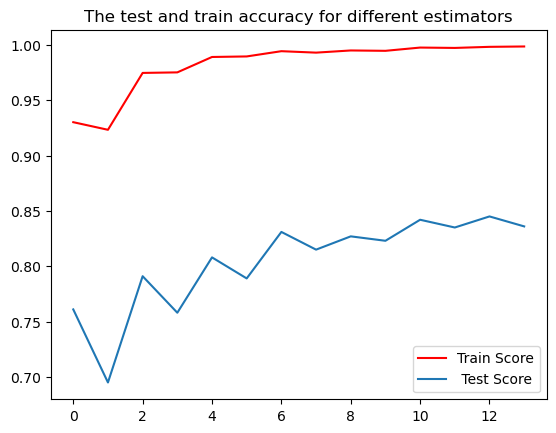

13


In [25]:
dt_train=[]
dt_test=[]
depth=[]
for i in range(1,15):
    my_random_forest = RandomForestClassifier(n_estimators=i,random_state=1)
    my_random_forest.fit(X_bal, y_bal)
    dt_train.append(my_random_forest.score(X_bal, y_bal))
    dt_test.append(my_random_forest.score(X_test1, y_test))
    depth.append(i)

plt.figure()
plt.title('The test and train accuracy for different estimators')
plt.plot(dt_train,color='red',label='Train Score')
plt.plot(dt_test,label=' Test Score')
plt.legend()
plt.show()
print(depth[np.argmax(dt_test)])

In [26]:
my_random_forest = RandomForestClassifier(n_estimators=13,random_state=1)
my_random_forest.fit(X_bal, y_bal)
print(f"Random Forest train: {my_random_forest.score(X_bal, y_bal)}")
print(f"Random Forest test: {my_random_forest.score(X_test1, y_test)}")

Random Forest train: 0.9982002617801047
Random Forest test: 0.845


###### Now we found the optimal n_estimators as 13, the both train and test accuracy are increased.

In [27]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test1)

In [28]:
# Creating confusion matrix/ dataFrame
con_mat_RF = confusion_matrix(y_test, y_pred_rand)
df_cm_RF = pd.DataFrame(con_mat_RF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_RF

,Predicted 0,Predicted 1
True 0,130,76
True 1,79,715


##### XGboost

In [30]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state=1)
XGB_model.fit(X_bal, y_bal)

print(f"XG Boost train score: {XGB_model.score(X_bal, y_bal)}")
print(f"XG Boost test score: {XGB_model.score(X_test1, y_test)}")

XG Boost train score: 0.9906740837696335
XG Boost test score: 0.866


#### Testing

##### Negative review

In [31]:
input_string = "The waiting time was really long."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",my_random_forest.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string: The waiting time was really long.
Logistic Regression model: [0]
Random Forest model      : [1]
XGboost model            : [0]


##### Negative review

In [32]:
input_string = " people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls."
print("\nPrediction on an input string: " + input_string)
print("Logistic Regression model:",logreg.predict(vect_1.transform([function_clean(input_string)])))
print("Random Forest model      :",my_random_forest.predict(vect_1.transform([function_clean(input_string)])))
print("XGboost model            :",XGB_model.predict(vect_1.transform([function_clean(input_string)])))


Prediction on an input string:  people that works here for sure is friendly! :)I do love that big menu book and seems like there are a lot of items to choose from. This is always nice as Vietnamese food is definitely more than pho and more spring rolls.
Logistic Regression model: [1]
Random Forest model      : [1]
XGboost model            : [1]
